In [2]:
#Importando as Bibliotecas
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sci
from scipy.stats import norm
from datetime import datetime, timedelta

In [3]:
#Definição dos períodos
end_data = datetime.now()
start_data = datetime.now() - timedelta(days=365*5)

In [4]:
#Extração de Dados
stocks = ["^BVSP"]
p_data = pd.DataFrame()

for s in stocks:
    p_data[s] = yf.download(s, start=start_data, end=end_data, progress=False)['Adj Close']

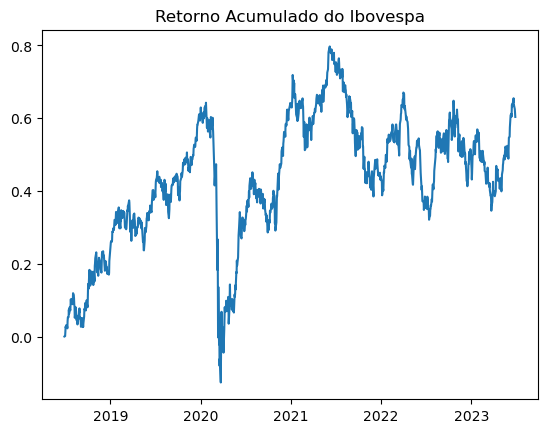

In [22]:
#Retorno acumulado
racumulado = p_data/p_data.iloc[0]-1

plt.plot(racumulado)
plt.title("Retorno Acumulado do Ibovespa")
plt.show()

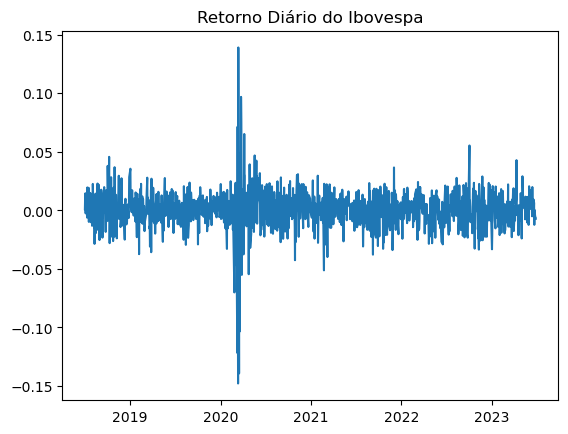

In [21]:
#Retorno diario
rdiario = p_data/p_data.shift(1).dropna()-1

plt.plot(rdiario)
plt.title("Retorno Diário do Ibovespa")
plt.show()

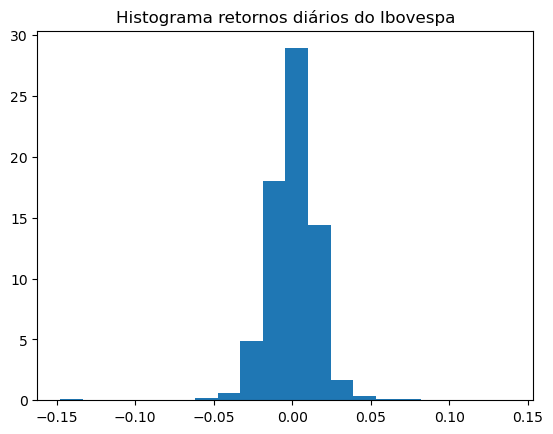

In [7]:
#Histograma de retornos diários

plt.hist(rdiario,bins=20,density=True)
plt.title("Histograma retornos diários do Ibovespa")
plt.show()

In [12]:
#Média e desvio padrão
media = rdiario.mean()
desvio = rdiario.std()
print(media)

^BVSP    0.000528
dtype: float64


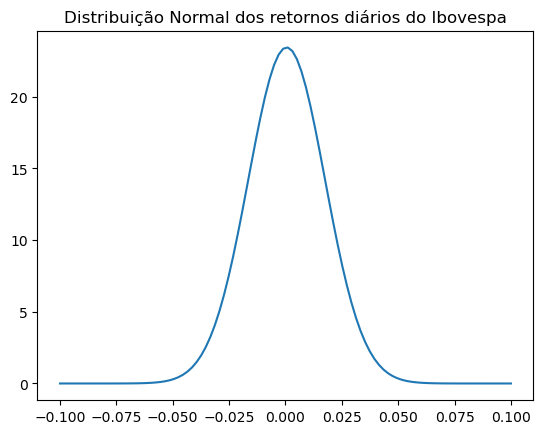

In [13]:
#Distribuição normal
eixo_x = np.linspace(-0.1,0.1,100)
eixo_y = norm.pdf(eixo_x,media,desvio)

plt.plot(eixo_x,eixo_y)
plt.title("Distribuição Normal dos retornos diários do Ibovespa")
plt.show()

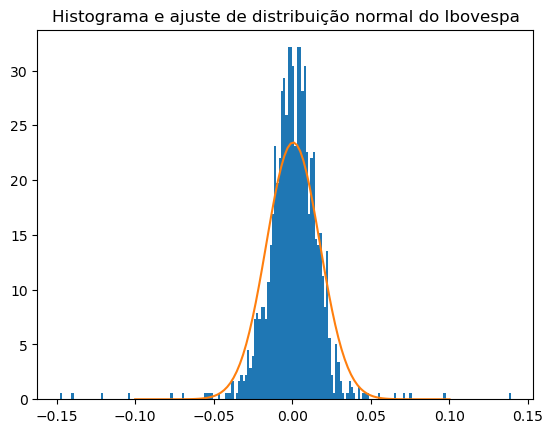

In [20]:
plt.hist(rdiario,bins=200,density=True)
plt.plot(eixo_x,eixo_y)
plt.title("Histograma e ajuste de distribuição normal do Ibovespa")
plt.show()

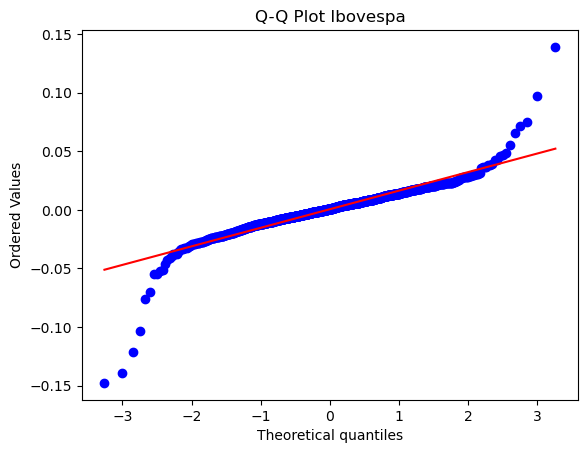

In [15]:
import itertools

rd_array=list(itertools.chain.from_iterable(rdiario.to_numpy()))

sci.probplot(rd_array, plot=plt)
plt.title("Q-Q Plot Ibovespa")
plt.show()

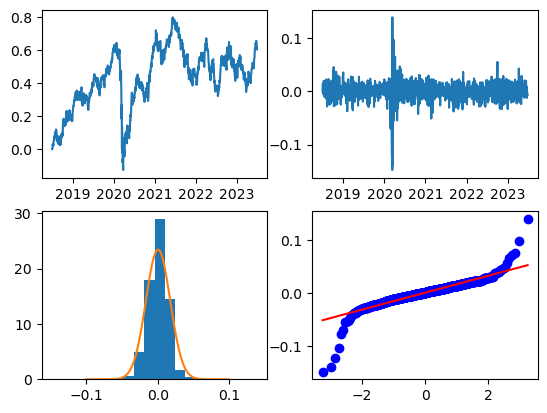

In [16]:
plt.subplot(2,2,1)
plt.plot(racumulado)

plt.subplot(2,2,2)
plt.plot(rdiario)

plt.subplot(2,2,3)
plt.hist(rdiario,bins=20,density=True)
plt.plot(eixo_x,eixo_y)

plt.subplot(2,2,4)
sci.probplot(rd_array, plot=plt)
plt.xlabel("")
plt.ylabel("")
plt.title("")

plt.show()